In [ ]:
import csv
import pandas as pd 
import re
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

def Pre_str_to_float(data):
  for i in range(len(data)):
    data[i]=float(data[i])
  return data

def Pre_process(data, col_name, func_name):
  data_transformed=func_name(data[col_name])
  data[col_name]=data_transformed
  return data

file=open('/content/loan_train_preprocessed.csv','r')
lines=csv.reader(file)

data=[]
for line in lines:
  data.append(line)
file.close()
data=DataFrame(data[1:len(data)], columns=data[0])

print('Print Data Columns Name:\n', data.columns.tolist())
print('\nPrint Data:\n',data)


pre_float_list=['loan_amnt','funded_amnt']
for i in pre_float_list:
  data=Pre_process(data,i, Pre_str_to_float)

#문자열 바꾸기
data=data.apply(pd.to_numeric)

Print Data Columns Name:
 ['id', 'loan_status', 'term', 'initial_list_status', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'tot_cur_bal', 'total_rev_hi_lim', 'home_ownershipRENT', 'home_ownershipMORTGAGE', 'home_ownershipOTHER', 'home_ownershipOWN', 'home_ownershipNONE', 'purposedebt_consolidation', 'purposecredit_card', 'purposehome_improvement', 'purposesmall_business', 'purposeother', 'purposemajor_purchase', 'purposewedding', 'purposecar', 'purposehouse', 'purposemoving', 'purposemedical', 'purposerenewable_energy', 'purposevacation', 'purposeeducational', 'earliest_cr_line2010', 'earliest_cr_line1990', 'earliest_cr_line2000', 'earliest_cr_line1970', 'earliest_cr_line1980', 'earliest_cr_line1960', 'earliest_cr_line1950']

Print Data:
       

In [ ]:
print('  데이터 내용 미리보기:')
print(data.head())

print('\n   데이터프레임 구조 보기:')
print(data.info())

  데이터 내용 미리보기:
   id  loan_status  ...  earliest_cr_line1960  earliest_cr_line1950
0   1            0  ...                     0                     0
1   2            0  ...                     0                     0
2   3            0  ...                     0                     0
3   4            0  ...                     0                     0
4   5            0  ...                     0                     0

[5 rows x 52 columns]

   데이터프레임 구조 보기:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16000 non-null  int64  
 1   loan_status                16000 non-null  int64  
 2   term                       16000 non-null  int64  
 3   initial_list_status        16000 non-null  int64  
 4   loan_amnt                  16000 non-null  float64
 5   funded_amnt                160

In [ ]:
print('행,열 개수:')
print(data.shape)

print('\n기본 정보 확인:')
print(data.describe())

print('\변수간 상관계수:')
print(data.corr())

행,열 개수:
(16000, 52)

기본 정보 확인:
                 id   loan_status  ...  earliest_cr_line1960  earliest_cr_line1950
count  16000.000000  16000.000000  ...          16000.000000           16000.00000
mean    8000.500000      0.500000  ...              0.001813               0.00025
std     4618.946489      0.500016  ...              0.042536               0.01581
min        1.000000      0.000000  ...              0.000000               0.00000
25%     4000.750000      0.000000  ...              0.000000               0.00000
50%     8000.500000      0.500000  ...              0.000000               0.00000
75%    12000.250000      1.000000  ...              0.000000               0.00000
max    16000.000000      1.000000  ...              1.000000               1.00000

[8 rows x 52 columns]
\변수간 상관계수:
                                 id  ...  earliest_cr_line1950
id                         1.000000  ...             -0.003864
loan_status                0.005701  ...              0.007907

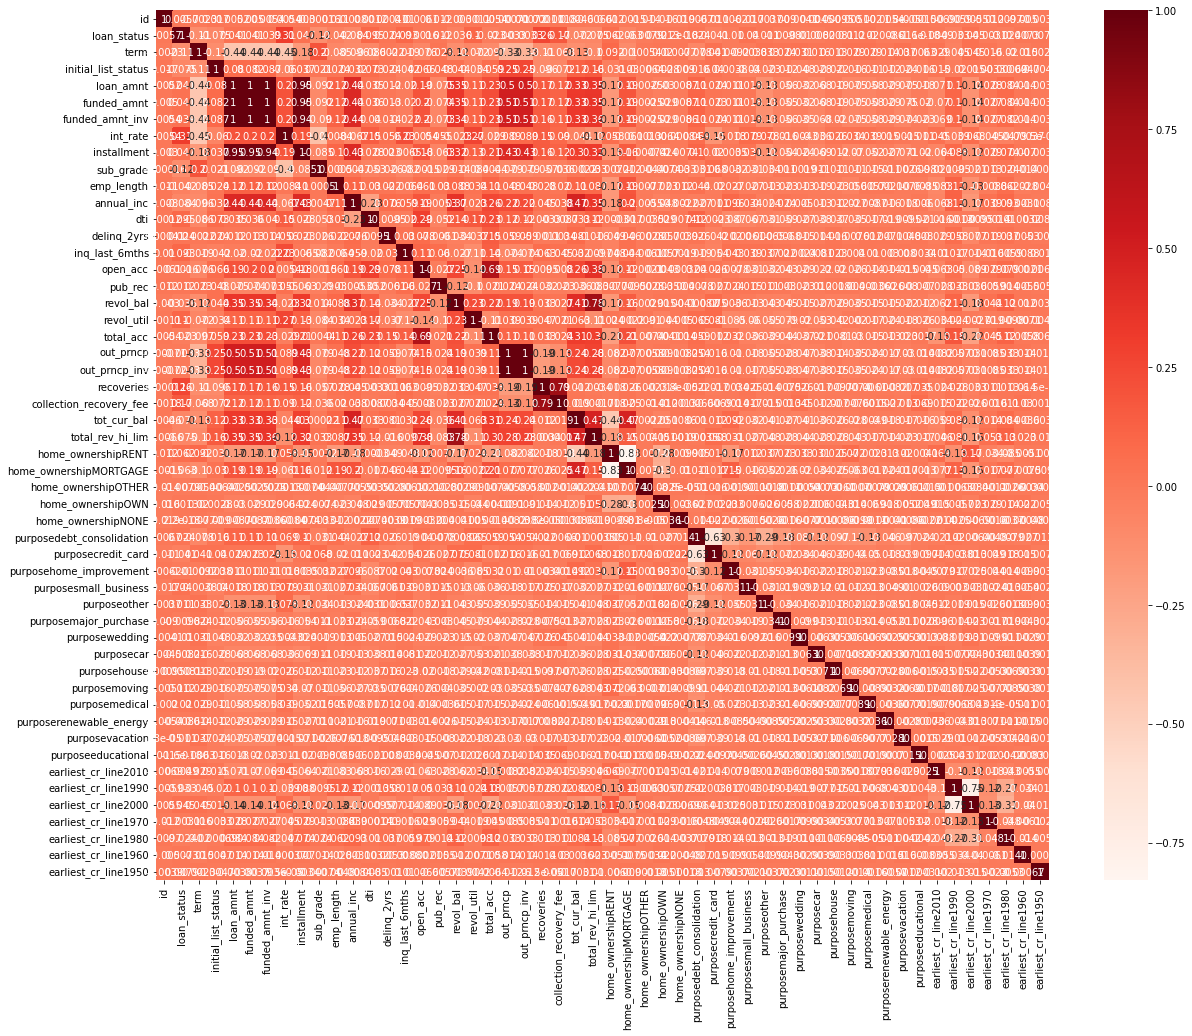

In [ ]:
#corr 시각화
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

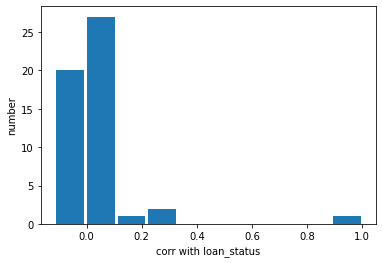


 loan_status    1.000000
int_rate       0.313449
recoveries     0.258617
Name: loan_status, dtype: float64


In [ ]:
#y값과 설명변수간의 corr 조사 

corr=data.corr(method='pearson')
corr=corr.iloc[1:,1:]
new_corr=corr.iloc[:,0]
plt.hist(new_corr,rwidth=0.9)
plt.xlabel('corr with loan_status')
plt.ylabel('number')
plt.show()

pick_corr=new_corr[new_corr>0.2]
print('\n',pick_corr)

In [ ]:
#설명변수끼리 상관관계 값 큰 것 필터링  보통 0.7기준
s=corr.unstack()
s=s[s>0.5]
s=s[s<0.99]
df=pd.DataFrame(s.sort_values(ascending=False),columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
installment,funded_amnt,0.948754
funded_amnt,installment,0.948754
loan_amnt,installment,0.947319
installment,loan_amnt,0.947319
funded_amnt_inv,installment,0.944949
installment,funded_amnt_inv,0.944949
recoveries,collection_recovery_fee,0.787515
collection_recovery_fee,recoveries,0.787515
total_rev_hi_lim,revol_bal,0.778298
revol_bal,total_rev_hi_lim,0.778298


Text(0, 0.5, 'funded_amnt')

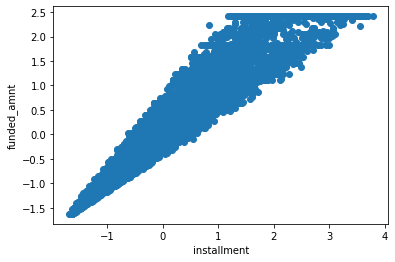

In [ ]:
g=data['installment']
h=data['funded_amnt']
plt.scatter(g,h)
plt.xlabel('installment')
plt.ylabel('funded_amnt')

Text(0, 0.5, 'out_prncp_inv')

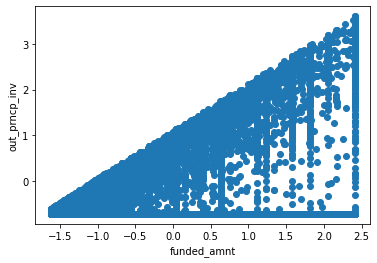

In [ ]:
h=data['funded_amnt']
i=data['out_prncp_inv']
plt.scatter(h,i)
plt.xlabel('funded_amnt')
plt.ylabel('out_prncp_inv')

Text(0, 0.5, 'dti')

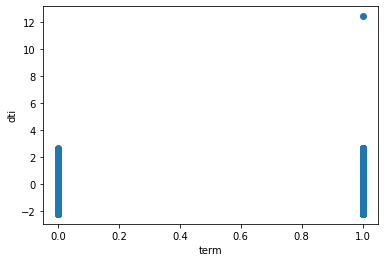

In [ ]:
j=data['term']
k=data['dti']
plt.scatter(j,k)
plt.xlabel('term')
plt.ylabel('dti')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


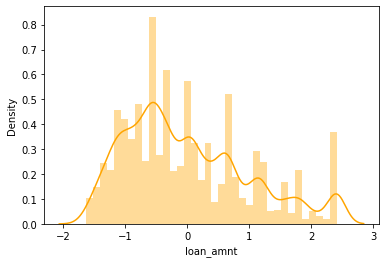

In [ ]:
#loan_amnt 분포
a_a=data['loan_amnt']
sns.distplot(a_a,color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


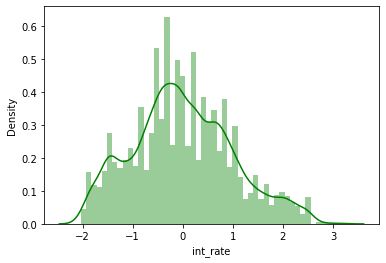

In [ ]:
#int_rate 분포
b_b=data['int_rate']
sns.distplot(b_b,color='green')

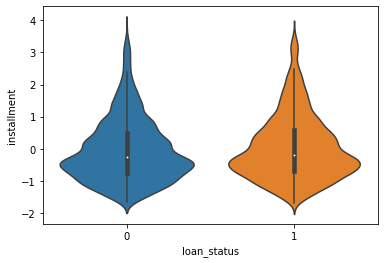

In [ ]:
#loan_status와 installment의 관계
c_c=sns.violinplot(x='loan_status',y='installment',data=data)